In [2]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

#plt.imshow(x_train[0])
#plt.show()
print("***************************")
#print(f"label is :{y_train[0]}")

#normalize
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)



uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [3]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

d:\Day2_AI\ai_bootcamp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3003 - loss: 1.9582 - val_accuracy: 0.3557 - val_loss: 1.8432
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3700 - loss: 1.7944 - val_accuracy: 0.3652 - val_loss: 1.7748
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3930 - loss: 1.7292 - val_accuracy: 0.3981 - val_loss: 1.7265
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4098 - loss: 1.6816 - val_accuracy: 0.3988 - val_loss: 1.7085
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4229 - loss: 1.6441 - val_accuracy: 0.4146 - val_loss: 1.6715
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4375 - loss: 1.6129 - val_accuracy: 0.4256 - val_loss: 1.6443
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4433 - loss: 1.5907 - val_accuracy: 0.4372 - val_loss: 1.6183
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4517 - loss: 1.5689 - val_accuracy: 0.

In [5]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4312 - loss: 1.5717
test loss:1.5717387199401855
test accuracy:0.4311999976634979


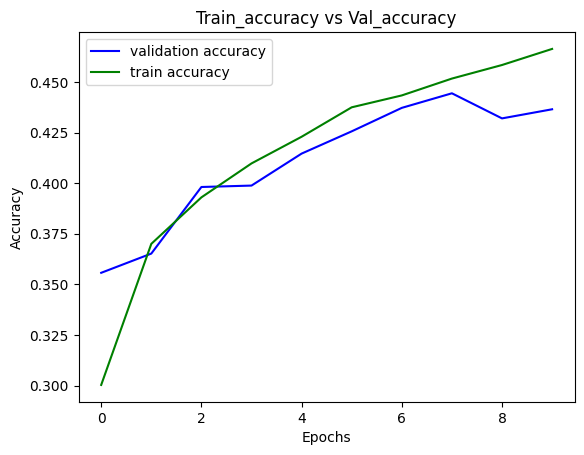

In [6]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

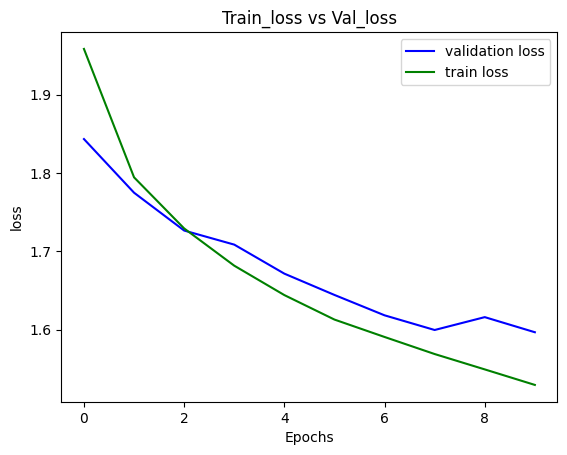

In [7]:
plt.plot(result.history['val_loss'],label="validation loss",color="blue")
plt.plot(result.history['loss'],label="train loss",color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Using Rmsprop

In [14]:
model1 = Sequential()
model1.add(Flatten(input_shape =(32,32,3)))
model1.add(Dense(128,'relu'))  #layer containg 128 neuron 
model1.add(Dense(10,'softmax'))       #10 neurons last layer
model1.compile(optimizer=RMSprop(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

#Train
result2=model1.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

d:\Day2_AI\ai_bootcamp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1009 - loss: 3.1319 - val_accuracy: 0.1022 - val_loss: 2.3040
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1444 - loss: 2.2162 - val_accuracy: 0.1823 - val_loss: 2.1146
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1674 - loss: 2.1259 - val_accuracy: 0.1686 - val_loss: 2.1391
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1726 - loss: 2.1142 - val_accuracy: 0.1856 - val_loss: 2.0600
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1708 - loss: 2.1093 - val_accuracy: 0.1367 - val_loss: 2.2203
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1725 - loss: 2.1064 - val_accuracy: 0.1739 - val_loss: 2.1675
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1734 - loss: 2.1045 - val_accuracy: 0.1769 - val_loss: 2.0820
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1720 - loss: 2.1023 - val_accuracy: 0.

In [16]:
loss,accuracy = model1.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1623 - loss: 2.1347
test loss:2.134711980819702
test accuracy:0.1623000055551529


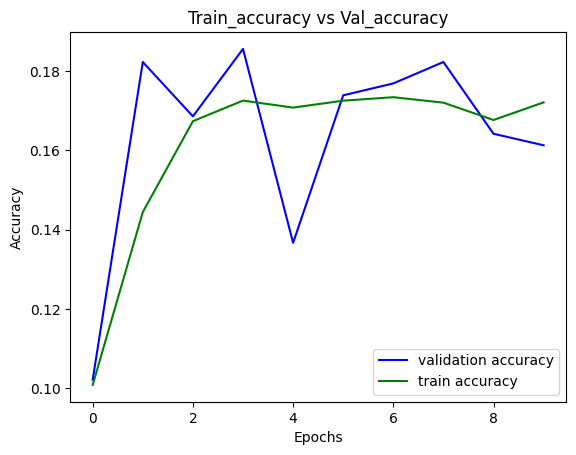

In [19]:
#visualization
plt.plot(result2.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result2.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

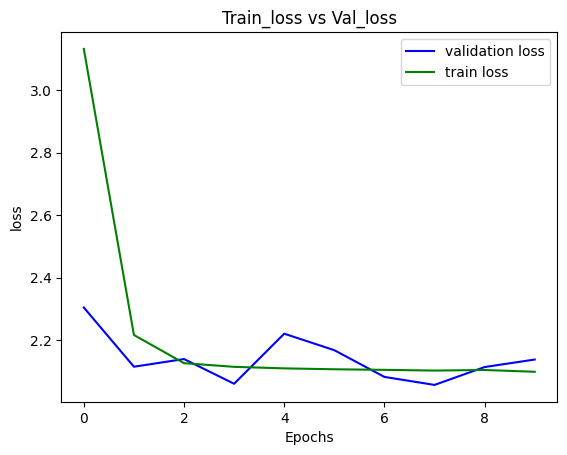

In [18]:
plt.plot(result2.history['val_loss'],label="validation loss",color="blue")
plt.plot(result2.history['loss'],label="train loss",color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [20]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

d:\Day2_AI\ai_bootcamp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1648 - loss: 2.5356 - val_accuracy: 0.1687 - val_loss: 2.0893
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1786 - loss: 2.0743 - val_accuracy: 0.1855 - val_loss: 2.0588
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1813 - loss: 2.0677 - val_accuracy: 0.1719 - val_loss: 2.0951
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1804 - loss: 2.0696 - val_accuracy: 0.1850 - val_loss: 2.0512
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1838 - loss: 2.0569 - val_accuracy: 0.1807 - val_loss: 2.0623
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1809 - loss: 2.0585 - val_accuracy: 0.1806 - val_loss: 2.0537
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1804 - loss: 2.0601 - val_accuracy: 0.1662 - val_loss: 2.0775
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1816 - loss: 2.0512 - val_accuracy: 0.